In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

In [2]:
# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.00,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.10,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.00,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,24.50,0.00,14.25,0.0,973.10,1343.50,720.0,0.0,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,28.00,0.00,12.75,0.0,203.25,959.40,435.0,0.0,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,23.75,0.00,12.50,0.0,29.90,128.45,80.0,0.0,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,47.75,0.00,32.75,64.0,186.60,1152.90,780.0,1.0,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [3]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
churn_df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,13.240000,15.783250,14.358750,12.2170,577.770750,507.007500,650.663750,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,15.643842,19.557103,14.781269,21.6326,746.608653,820.027858,941.470689,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,0.000000,0.000000,0.000000,0.0000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,0.000000,0.000000,0.000000,0.0000,79.337500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,0.000000,0.000000,12.500000,0.0000,289.525000,0.000000,342.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,24.750000,33.012500,20.750000,23.4625,806.762500,724.162500,921.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,68.500000,63.250000,109.250000,109.7000,4333.000000,4938.600000,7515.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [14]:
X = np.asarray(churn_df[['tenure','age','income','internet','employ','ed']])
y = np.asarray(churn_df['churn'])
print(X)

[[ 11.  33. 136.   0.   5.   5.]
 [ 33.  33.  33.   0.   0.   2.]
 [ 23.  30.  30.   0.   2.   1.]
 ...
 [  6.  32.  47.   0.  10.   1.]
 [ 24.  30.  25.   1.   5.   4.]
 [ 61.  50. 190.   1.  22.   2.]]


In [18]:
X = StandardScaler().fit_transform(X)
X[0:4]

array([[-1.13518441, -0.62595491,  0.4751423 , -0.88640526, -0.58477841,
         1.6961288 ],
       [-0.11604313, -0.62595491, -0.32886061, -0.88640526, -1.14437497,
        -0.6433592 ],
       [-0.57928917, -0.85594447, -0.35227817, -0.88640526, -0.92053635,
        -1.42318853],
       [ 0.11557989, -0.47262854,  0.00679109,  1.12815215, -0.02518185,
        -0.6433592 ]])

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train[0:5]

array([[ 0.43985211, -0.85594447, -0.094685  ,  1.12815215, -0.69669772,
         1.6961288 ],
       [-1.36680743, -0.7026181 , -0.21957866, -0.88640526, -0.02518185,
        -1.42318853],
       [ 0.48617672,  0.06401376, -0.18054939, -0.88640526, -0.36093978,
         0.91629947],
       [ 0.81044894, -1.46924996, -0.39130744,  1.12815215, -1.14437497,
         0.91629947],
       [-0.53296457, -0.47262854, -0.26641378,  1.12815215, -0.4728591 ,
         1.6961288 ]])

In [20]:
lr = LogisticRegression().fit(X_train , y_train)


In [21]:
y_pred = lr.predict(X_test)
y_pred[0:4]

array([0., 1., 0., 0.])

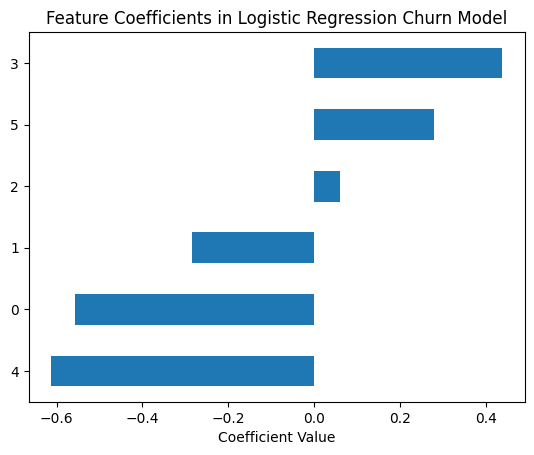

In [23]:
coefficients = pd.Series(lr.coef_[0])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [24]:
y_pred_prob = lr.predict_proba(X_test)
log_loss(y_test , y_pred_prob)

0.45859833045134496